In [27]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [28]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from pyTVDN.TVDNutils import GetBsplineEst
from scipy.signal import detrend
%matplotlib inline

In [29]:
resDir = Path("../results")
dataDir = Path("../data")

In [30]:
filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

In [31]:
fMRI = fMRIs[0, 9]["fMRI"][:90, :]

## 1. Detection with B-spline and `1e-4` smooth penalty parameter

In [32]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", 
                     r=6, kappa=1.65, fct=0.5, lamb=1e-4, plotfct=180, downRate=4, 
                     MaxM=10, Lmin=4, freq=0.5, showProgress=True)

The parameters for detection are:
{'Lmin': 4,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': False,
 'kappa': 1.65,
 'lamb': 0.0001,
 'plotfct': 180,
 'r': 6}


In [33]:
fMRIdet()

### Tuning the kappa parameters

In [34]:
kappas = np.arange(1.45, 2, step=0.1)
fMRIdet.TuningKappa(kappas)

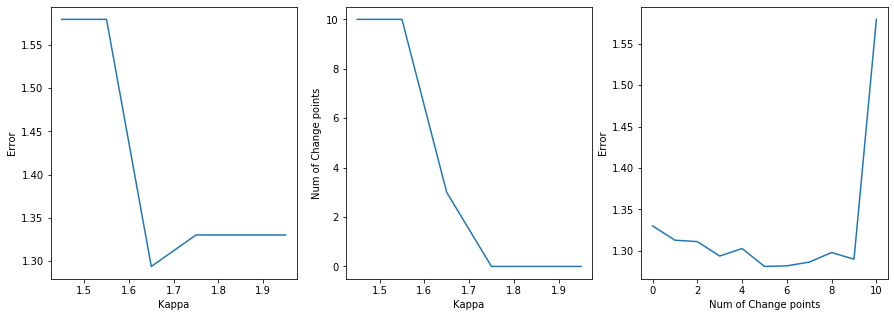

In [35]:
fMRIdet.PlotKappaErrCurve()

### Then we  can check the best kappa parameters w.r.t mean square errors

In [36]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.6500000000000001
The optimal number of change point under the range of kappa we speicified is: 3
The optimal number of change point is: 5


### Check the results after updating

In [37]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+----------------+-------------------+------+
| Num of CPTs | Estiamted CPTs |        MSE        | Rank |
+-------------+----------------+-------------------+------+
|      3      | [33. 57. 97.]  | 1.293530390243997 |  6   |
+-------------+----------------+-------------------+------+


### Plot the detection results under the optimal kappa

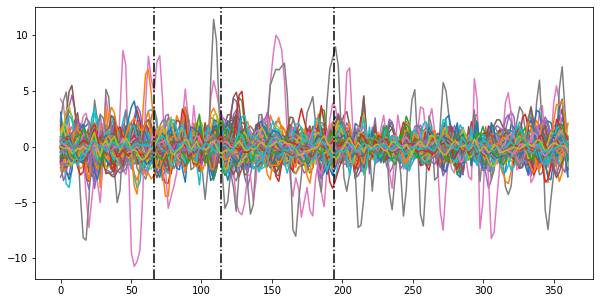

In [38]:
fMRIdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa


The plot indices are [85 49 14 78 40].


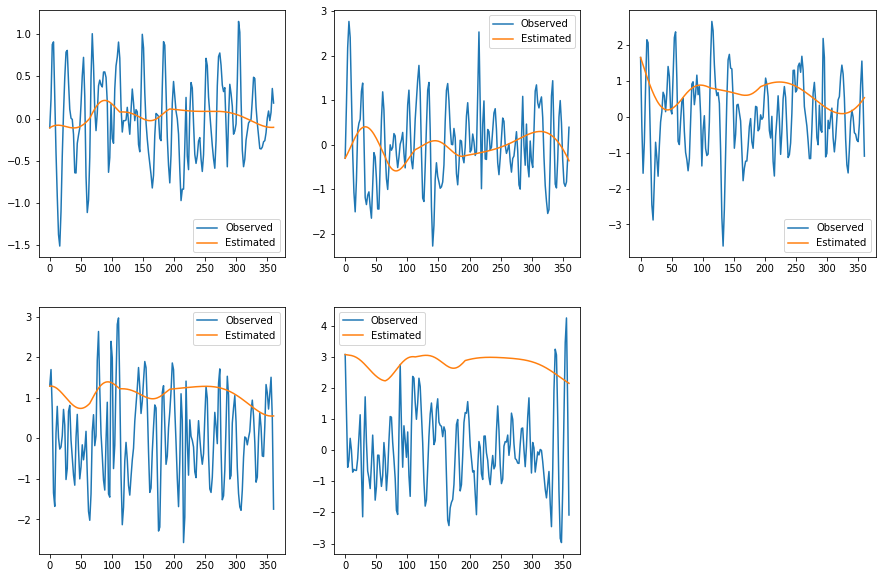

In [39]:
fMRIdet.PlotRecCurve(saveFigPath=None)

### Detrend comparison

In [40]:
nYmat = fMRIdet.nYmat
d, _ = nYmat.shape
denYmat = detrend(nYmat)
detrendRecX = detrend(fMRIdet.RecResCur.EstXmatReal)

In [41]:
idxs = [85, 49, 14, 78, 40]

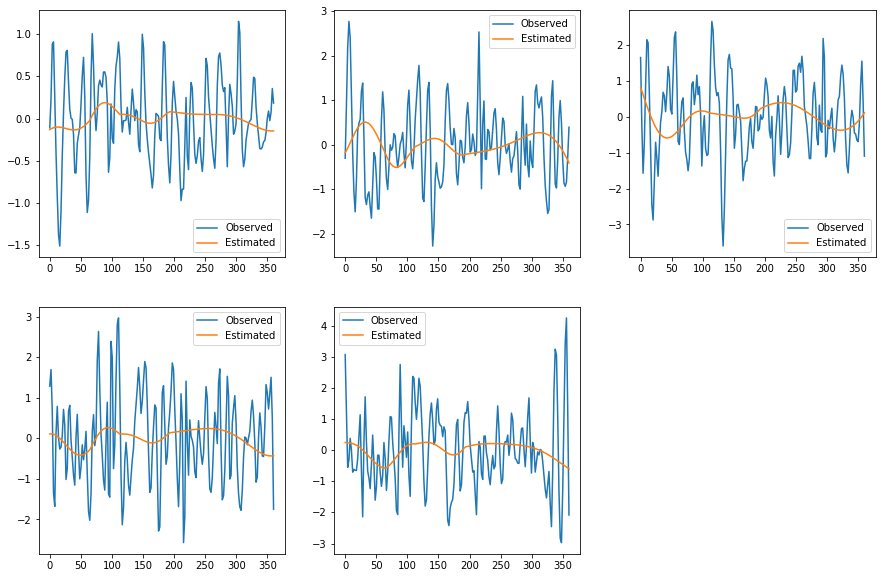

In [42]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, denYmat[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, detrendRecX[idx, :], label="Estimated")
    plt.legend()

### Plot the reconstructed imaginary part

The plot indices are [85, 49, 14, 78, 40].


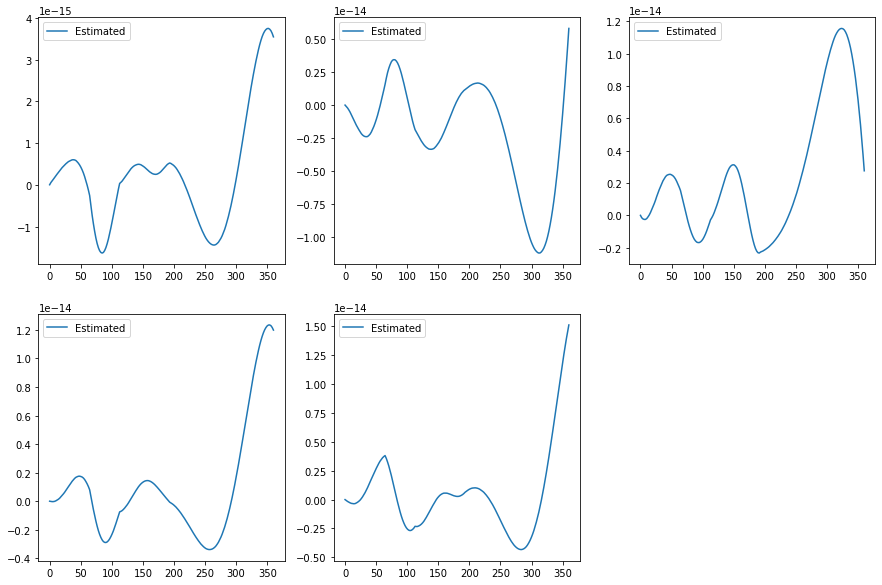

In [43]:
fMRIdet.PlotRecCurve(idxs=[85, 49, 14, 78, 40], saveFigPath=None, is_imag=True)

In [44]:
nYmat = fMRIdet.nYmat
d, n = nYmat.shape
RecCur = fMRIdet.RecResCur.EstXmatReal + fMRIdet.RecResCur.EstXmatImag*1j
fftnYmat = np.fft.fft(nYmat, axis=1)
fftRecCur = np.fft.fft(RecCur, axis=1)

In [46]:
#diff = fftnYmat - fftRecCur
#errs2 = np.sum(np.abs(diff)**2, axis=1)/np.sum(np.abs(fftnYmat)**2, axis=1)
#errs = np.sqrt(errs2)
#argidxs = np.argsort(errs)
#qidxs = np.quantile(np.arange(d), [0, 0.25, 0.5, 0.75, 1]).astype(np.int)
#idxs = argidxs[qidxs]
idxs = [85, 49, 14, 78, 40]

### Real part after the FFT

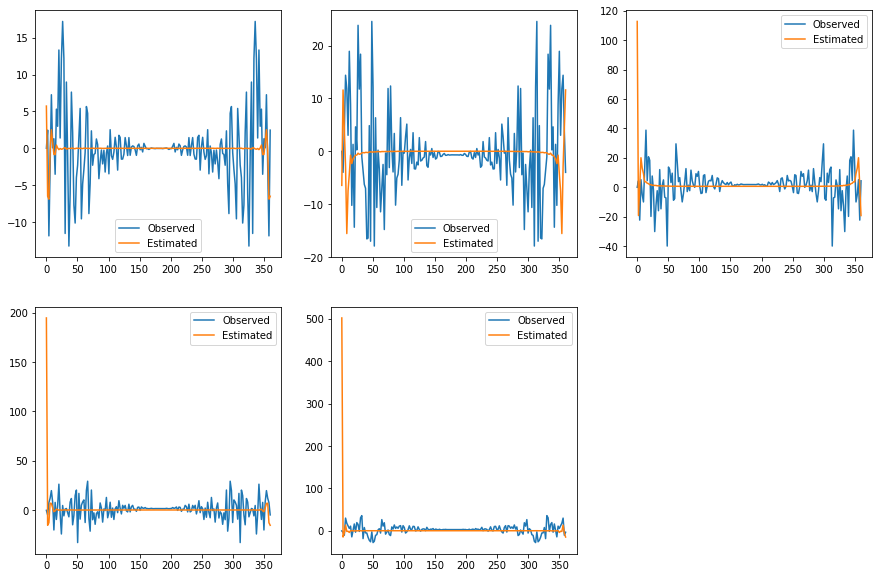

In [47]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, fftnYmat.real[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, fftRecCur.real[idx, :], label="Estimated")
    plt.legend()

### Imaginary part after the FFT

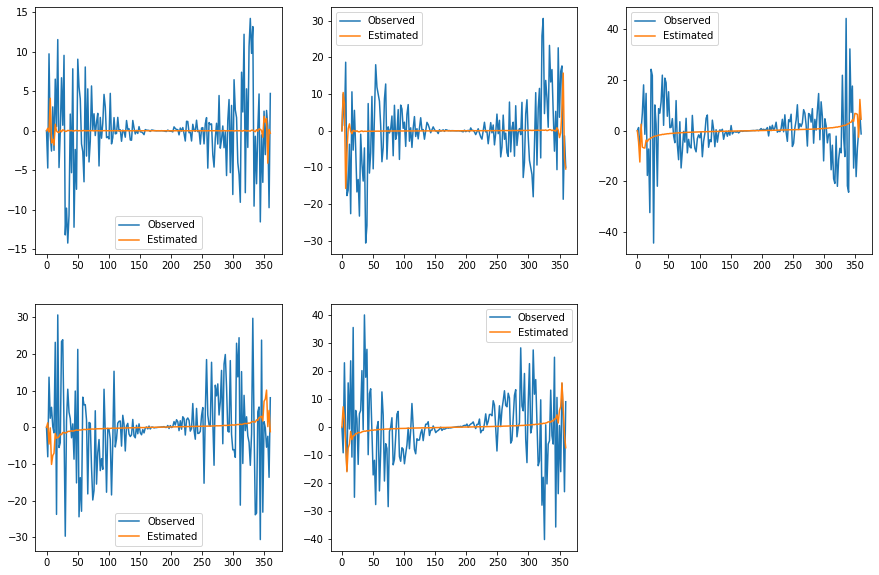

In [48]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, fftnYmat.imag[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, fftRecCur.imag[idx, :], label="Estimated")
    plt.legend()

### Plot the eigenvalue curve under the optimal kappa

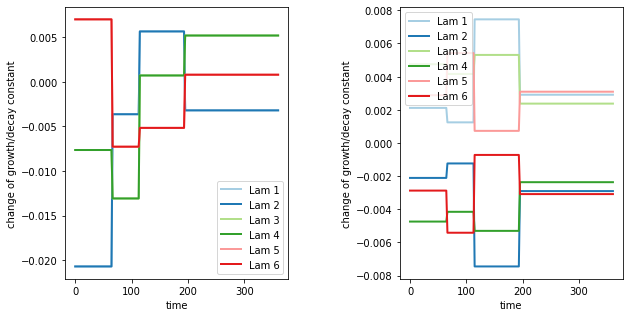

In [19]:
fMRIdet.PlotEigenCurve(saveFigPath=None)

## 2. Detection with B-spline and `8e-5` smooth penalty parameter

In [20]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", 
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5, showProgress=False)

In [21]:
fMRIdet()

### Tuning the kappa parameters

In [22]:
kappas = np.arange(1.45, 2, step=0.01)
fMRIdet.TuningKappa(kappas)

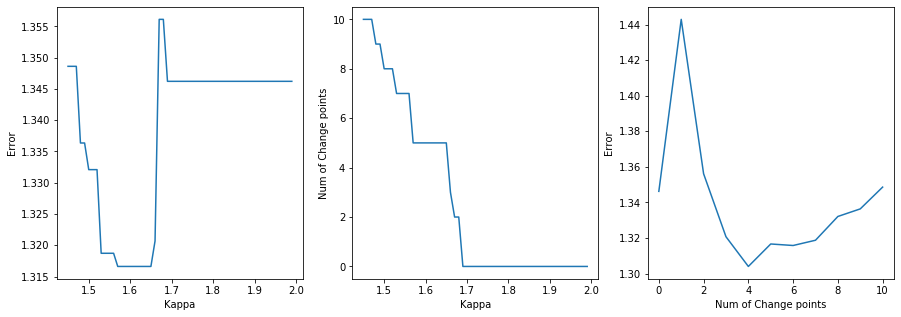

In [23]:
fMRIdet.PlotKappaErrCurve()

### Then we  can check the best kappa parameters w.r.t mean square errors

In [24]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.57
The optimal number of change point under the range of kappa we speicified is: 5
The optimal number of change point is: 4


### Check the results after updating

In [25]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+----------------------------+--------------------+------+
| Num of CPTs |       Estiamted CPTs       |        MSE         | Rank |
+-------------+----------------------------+--------------------+------+
|      5      | [ 11.  29.  56.  85. 157.] | 1.3166149955079542 |  6   |
+-------------+----------------------------+--------------------+------+


### Plot the detection results under the optimal kappa

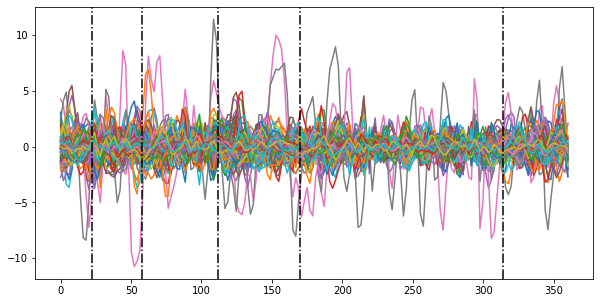

In [26]:
fMRIdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa

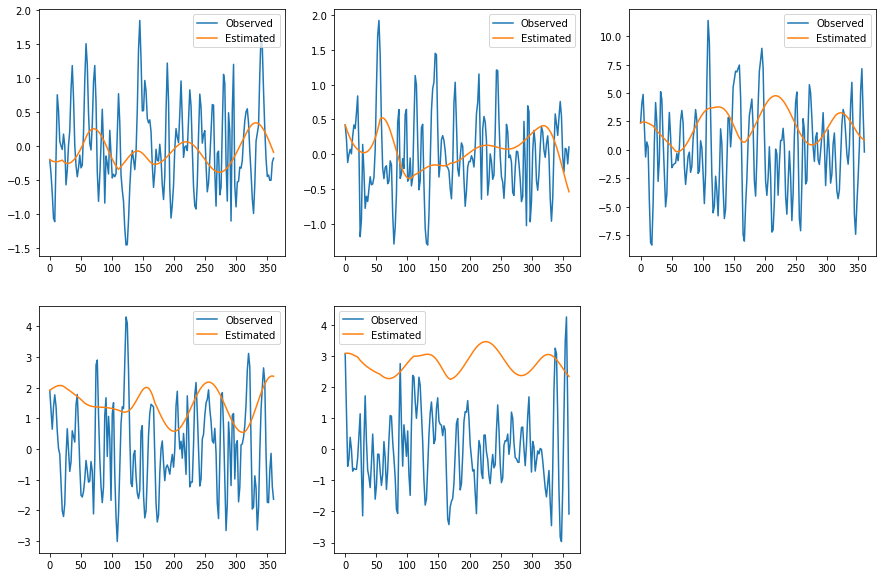

In [27]:
fMRIdet.PlotRecCurve(saveFigPath=None)

### Plot the reconstructed imaginary part

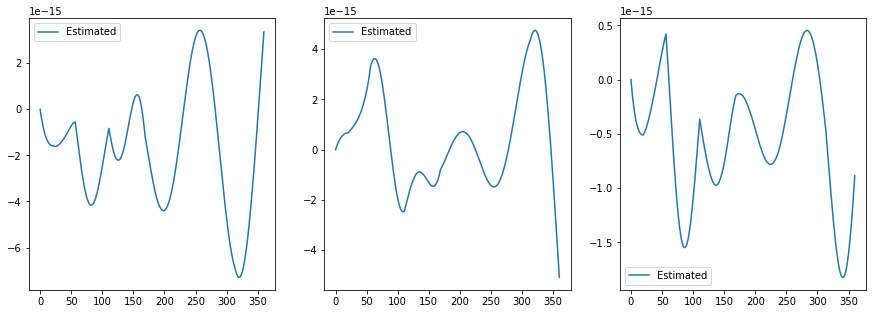

In [28]:
fMRIdet.PlotRecCurve(idxs=[1, 10, 50], saveFigPath=None, is_imag=True)

In [29]:
nYmat = fMRIdet.nYmat
d, n = nYmat.shape
RecCur = fMRIdet.RecResCur.EstXmatReal + fMRIdet.RecResCur.EstXmatImag*1j
fftnYmat = np.fft.fft(nYmat, axis=1)
fftRecCur = np.fft.fft(RecCur, axis=1)

In [30]:
diff = fftnYmat - fftRecCur
errs2 = np.sum(np.abs(diff)**2, axis=1)/np.sum(np.abs(fftnYmat)**2, axis=1)
errs = np.sqrt(errs2)
argidxs = np.argsort(errs)
qidxs = np.quantile(np.arange(d), [0, 0.25, 0.5, 0.75, 1]).astype(np.int)
idxs = argidxs[qidxs]

### Real part after the FFT

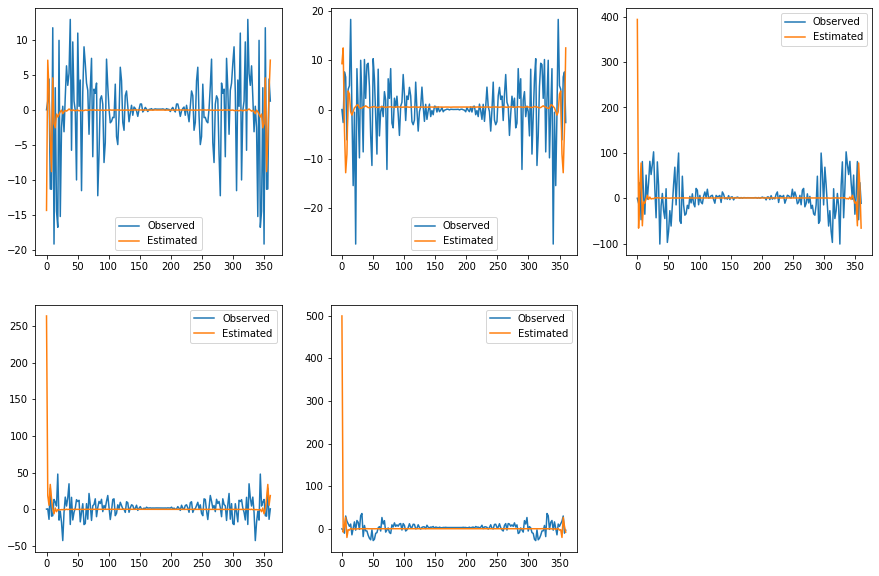

In [31]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, fftnYmat.real[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, fftRecCur.real[idx, :], label="Estimated")
    plt.legend()

### Imaginary part after the FFT

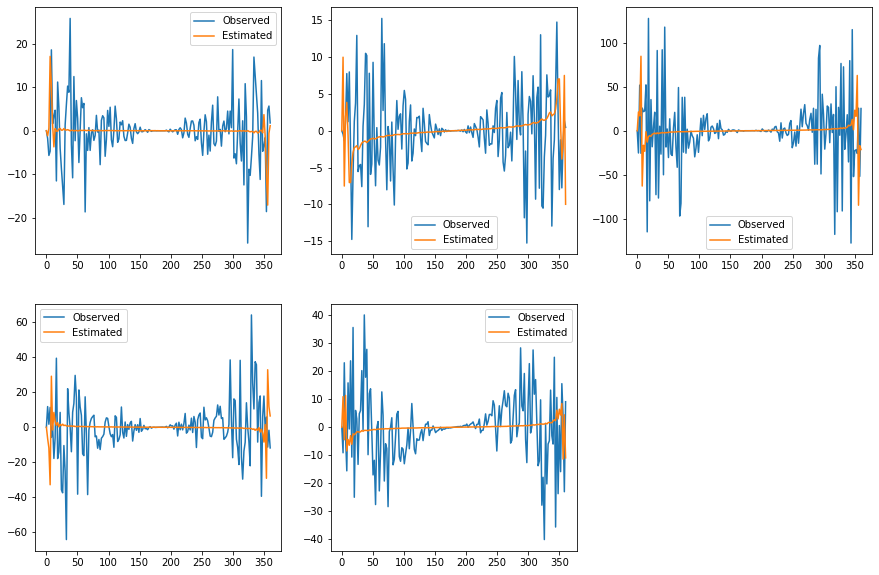

In [32]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, fftnYmat.imag[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, fftRecCur.imag[idx, :], label="Estimated")
    plt.legend()

### Plot the eigenvalue curve under the optimal kappa

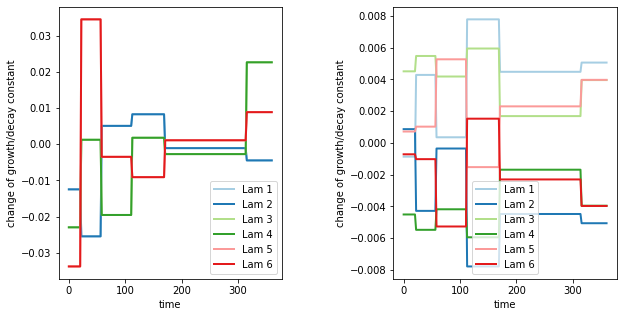

In [33]:
fMRIdet.PlotEigenCurve(saveFigPath=None)

## 3. Detection with B-spline and `1e-6` smooth penalty parameter

In [34]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", 
                     r=6, kappa=1.65, fct=0.5, lamb=1e-6, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5, showProgress=False)
fMRIdet()

In [35]:
kappas = np.arange(1., 3, step=0.01)
#kappas = [1.45, 1.55, 1.65, 1.75, 1.85, 1.95]
fMRIdet.TuningKappa(kappas)

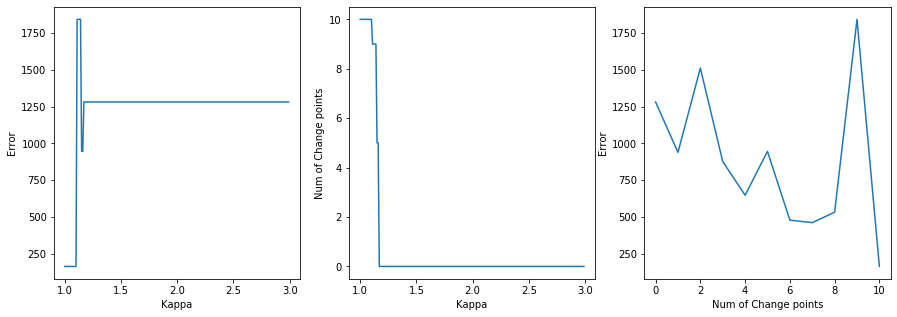

In [36]:
fMRIdet.PlotKappaErrCurve()

### Then we  can check the best kappa parameters w.r.t mean square errors

In [37]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.0
The optimal number of change point under the range of kappa we speicified is: 10
The optimal number of change point is: 10


### Check the results after updating

In [38]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+-----------------------------------------------------+--------------------+------+
| Num of CPTs |                    Estiamted CPTs                   |        MSE         | Rank |
+-------------+-----------------------------------------------------+--------------------+------+
|      10     | [ 20.  49.  55.  94. 102. 121. 127. 133. 139. 145.] | 164.44852351211009 |  6   |
+-------------+-----------------------------------------------------+--------------------+------+


### Plot the detection results under the optimal kappa

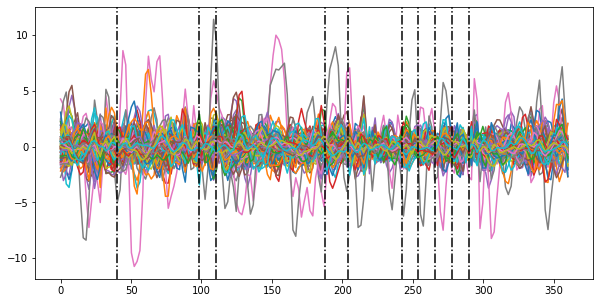

In [39]:
fMRIdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa

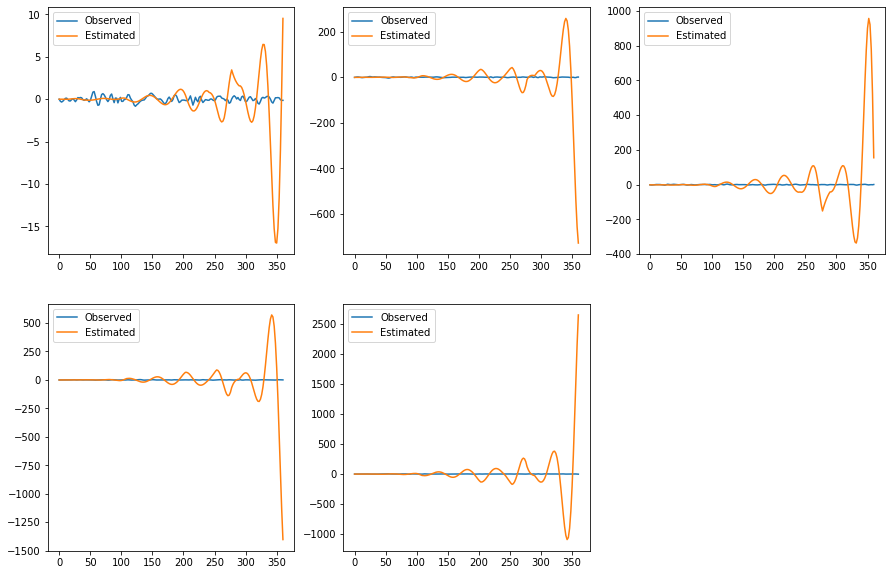

In [40]:
fMRIdet.PlotRecCurve(saveFigPath=None)

### Plot the reconstructed imaginary part

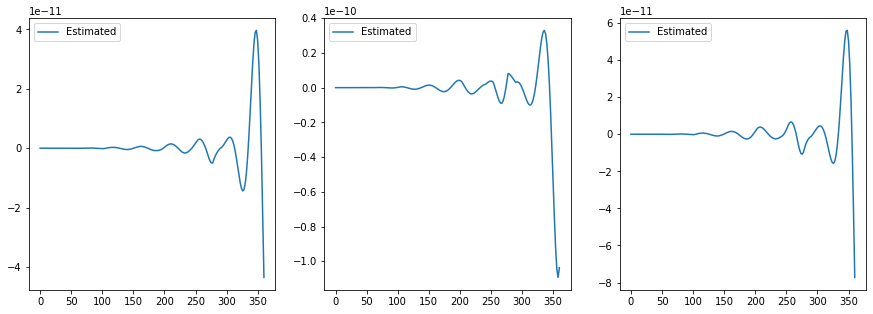

In [41]:
fMRIdet.PlotRecCurve(idxs=[1, 10, 50], saveFigPath=None, is_imag=True)

In [42]:
nYmat = fMRIdet.nYmat
d, n = nYmat.shape
RecCur = fMRIdet.RecResCur.EstXmatReal + fMRIdet.RecResCur.EstXmatImag*1j
fftnYmat = np.fft.fft(nYmat, axis=1)
fftRecCur = np.fft.fft(RecCur, axis=1)

In [43]:
diff = fftnYmat - fftRecCur
errs2 = np.sum(np.abs(diff)**2, axis=1)/np.sum(np.abs(fftnYmat)**2, axis=1)
errs = np.sqrt(errs2)
argidxs = np.argsort(errs)
qidxs = np.quantile(np.arange(d), [0, 0.25, 0.5, 0.75, 1]).astype(np.int)
idxs = argidxs[qidxs]

### Real part after the FFT

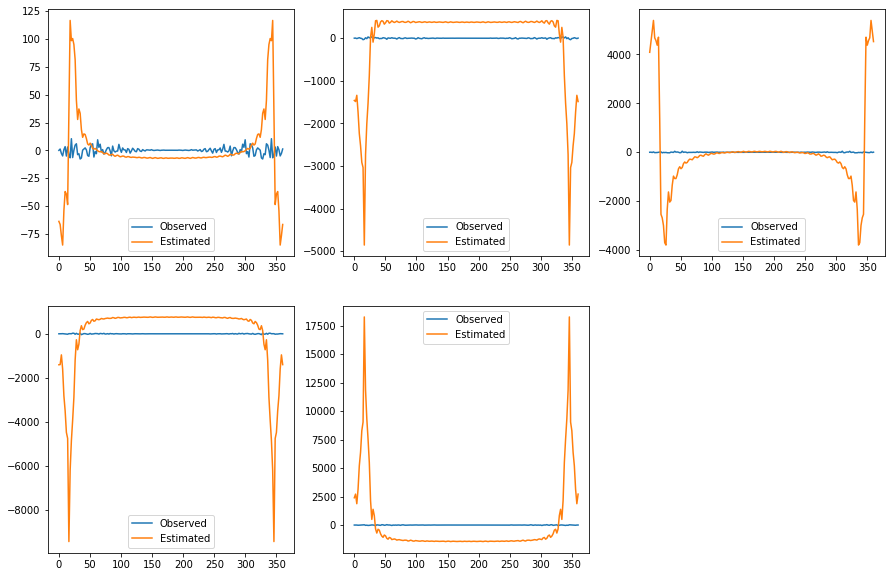

In [44]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, fftnYmat.real[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, fftRecCur.real[idx, :], label="Estimated")
    plt.legend()

### Imaginary part after the FFT

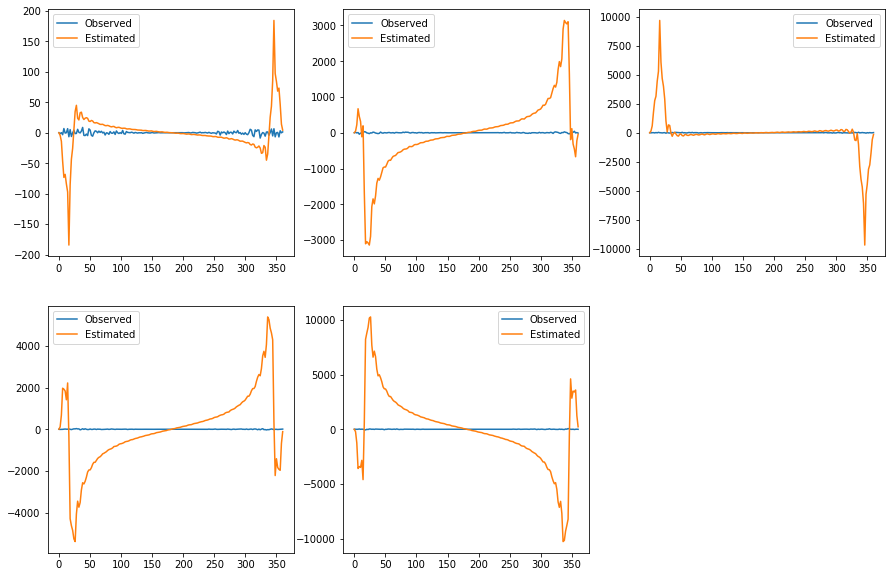

In [45]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, fftnYmat.imag[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, fftRecCur.imag[idx, :], label="Estimated")
    plt.legend()

### Plot the eigenvalue curve under the optimal kappa

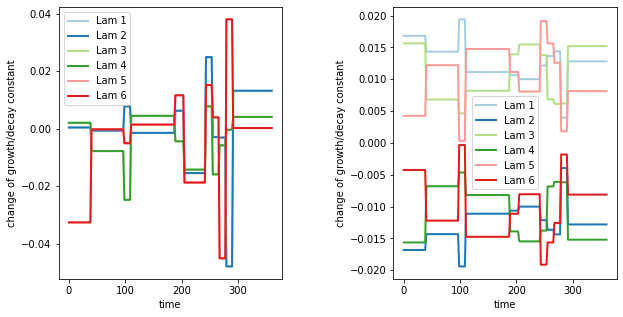

In [46]:
fMRIdet.PlotEigenCurve(saveFigPath=None)

## 4. Detection with B-spline and `1e-4` smooth penalty parameter and half bandwith `h`

In [47]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=False, 
                     r=6, kappa=1.65, fct=0.25, lamb=1e-4, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5)

In [48]:
fMRIdet()

### Tuning the kappa parameters

In [49]:
kappas = np.arange(1.45, 2, step=0.01)
fMRIdet.TuningKappa(kappas)

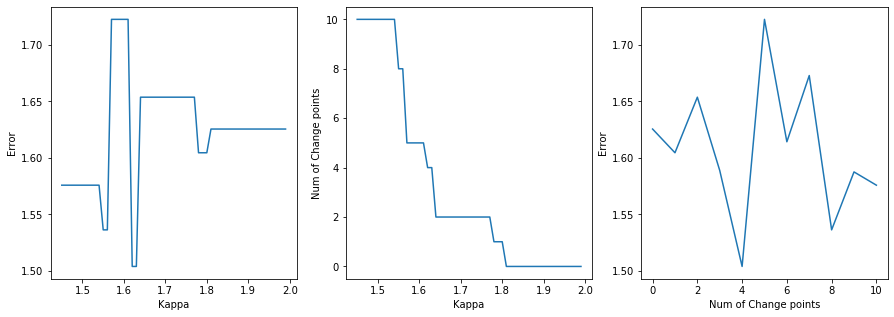

In [50]:
fMRIdet.PlotKappaErrCurve()

### Then we  can check the best kappa parameters w.r.t mean square errors

In [51]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.62
The optimal number of change point under the range of kappa we speicified is: 4
The optimal number of change point is: 4


### Check the results after updating

In [52]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+-----------------------+--------------------+------+
| Num of CPTs |     Estiamted CPTs    |        MSE         | Rank |
+-------------+-----------------------+--------------------+------+
|      4      | [ 20.  29.  48. 101.] | 1.5039113855290578 |  6   |
+-------------+-----------------------+--------------------+------+


### Plot the detection results under the optimal kappa

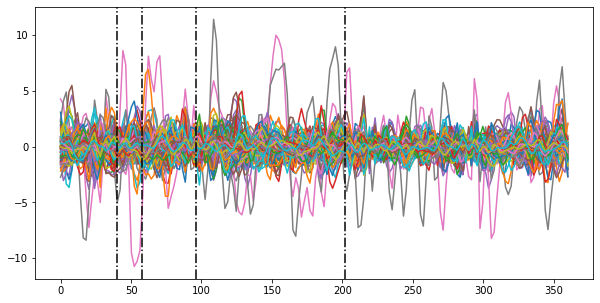

In [53]:
fMRIdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa

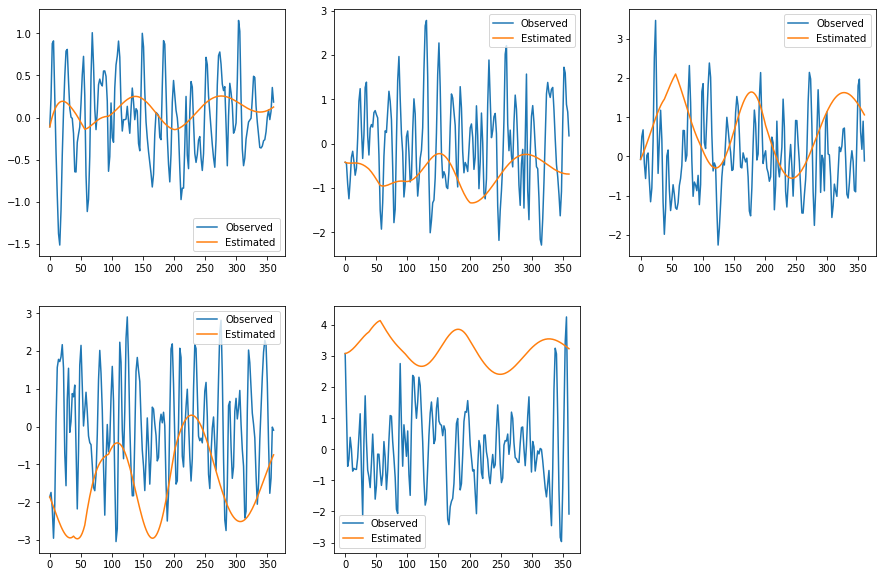

In [54]:
fMRIdet.PlotRecCurve(saveFigPath=None)

### Plot the reconstructed imaginary part

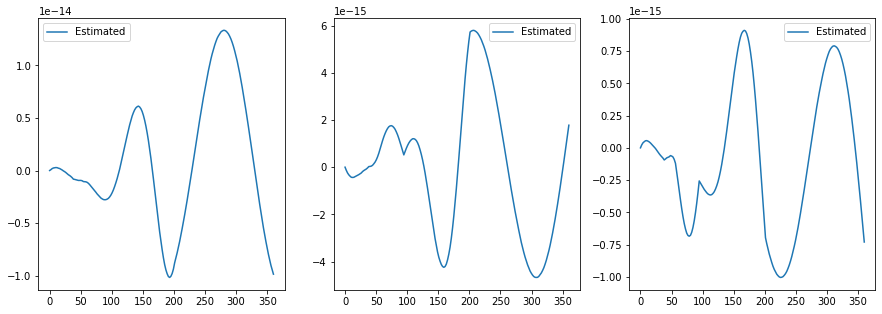

In [55]:
fMRIdet.PlotRecCurve(idxs=[1, 10, 50], saveFigPath=None, is_imag=True)

In [56]:
nYmat = fMRIdet.nYmat
d, n = nYmat.shape
RecCur = fMRIdet.RecResCur.EstXmatReal + fMRIdet.RecResCur.EstXmatImag*1j
fftnYmat = np.fft.fft(nYmat, axis=1)
fftRecCur = np.fft.fft(RecCur, axis=1)

In [57]:
diff = fftnYmat - fftRecCur
errs2 = np.sum(np.abs(diff)**2, axis=1)/np.sum(np.abs(fftnYmat)**2, axis=1)
errs = np.sqrt(errs2)
argidxs = np.argsort(errs)
qidxs = np.quantile(np.arange(d), [0, 0.25, 0.5, 0.75, 1]).astype(np.int)
idxs = argidxs[qidxs]

### Real part after the FFT

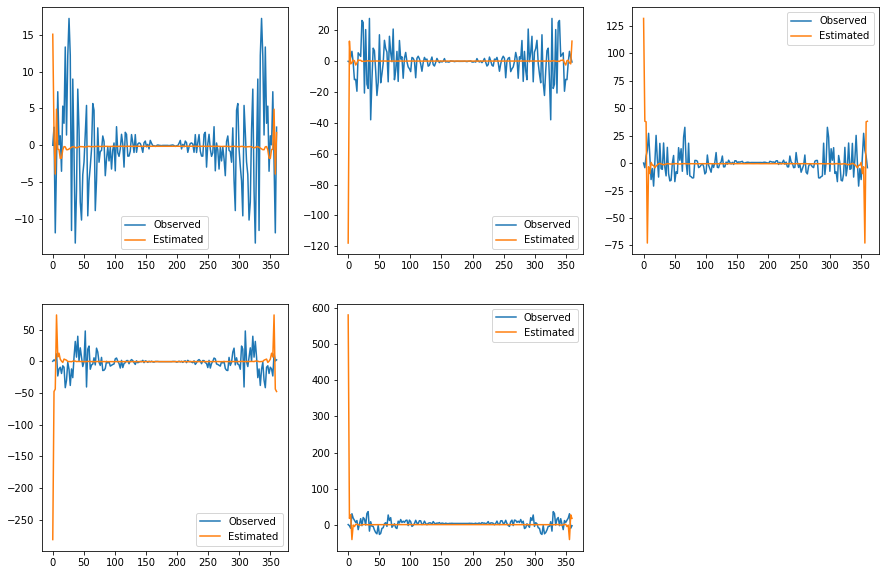

In [58]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, fftnYmat.real[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, fftRecCur.real[idx, :], label="Estimated")
    plt.legend()

### Imaginary part after the FFT

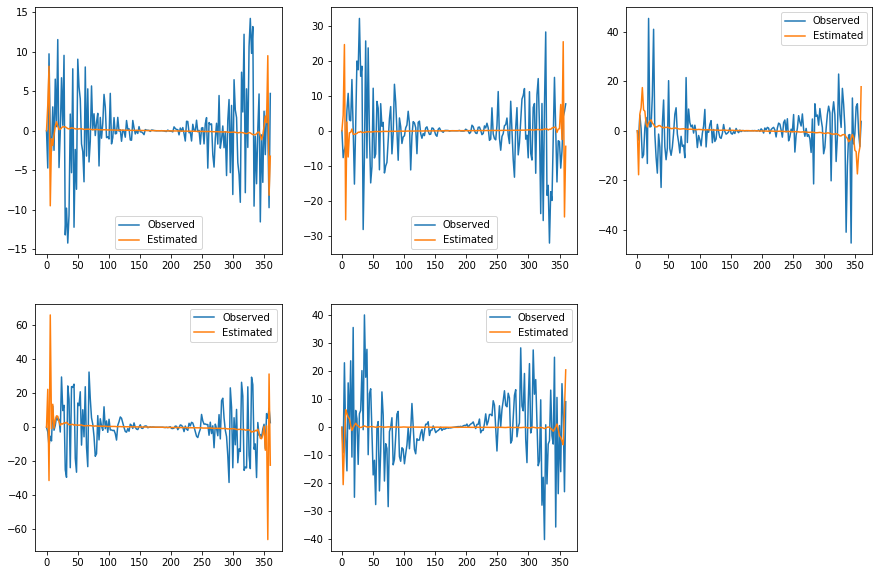

In [59]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, fftnYmat.imag[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, fftRecCur.imag[idx, :], label="Estimated")
    plt.legend()

### Plot the eigenvalue curve under the optimal kappa

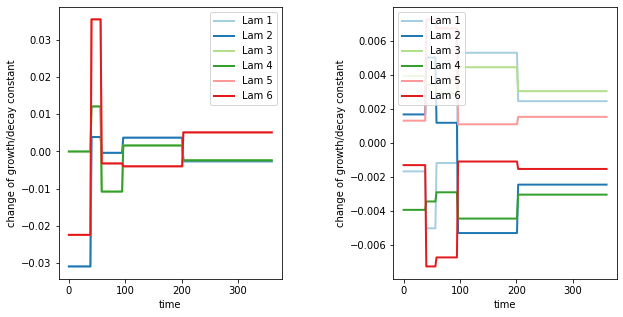

In [60]:
fMRIdet.PlotEigenCurve(saveFigPath=None)

## 5. Detection with B-spline and `1e-4` smooth penalty parameter and double bandwith `h`

In [61]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=False, 
                     r=6, kappa=1.65, fct=1, lamb=1e-4, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5)

In [62]:
fMRIdet()

### Tuning the kappa parameters

In [63]:
kappas = np.arange(1.45, 2, step=0.01)
fMRIdet.TuningKappa(kappas)

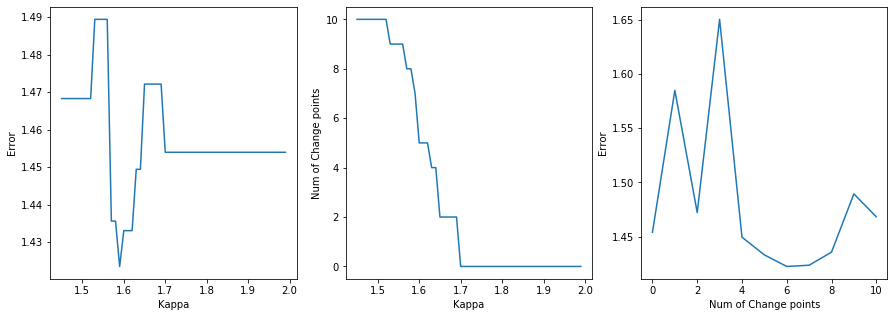

In [64]:
fMRIdet.PlotKappaErrCurve()

### Then we  can check the best kappa parameters w.r.t mean square errors

In [65]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.59
The optimal number of change point under the range of kappa we speicified is: 7
The optimal number of change point is: 6


### Check the results after updating

In [66]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+--------------------------------------+--------------------+------+
| Num of CPTs |            Estiamted CPTs            |        MSE         | Rank |
+-------------+--------------------------------------+--------------------+------+
|      7      | [ 13.  34.  55. 105. 122. 162. 169.] | 1.4235657100897958 |  6   |
+-------------+--------------------------------------+--------------------+------+


### Plot the detection results under the optimal kappa

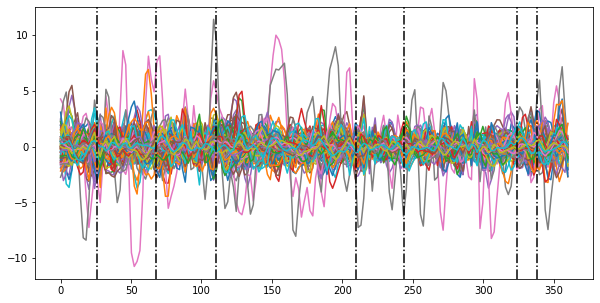

In [67]:
fMRIdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa

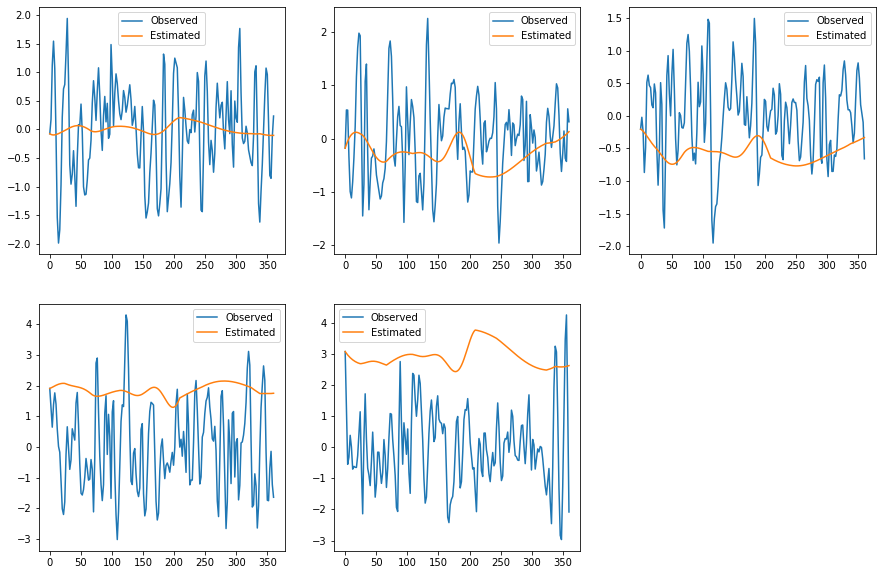

In [68]:
fMRIdet.PlotRecCurve(saveFigPath=None)

### Plot the reconstructed imaginary part

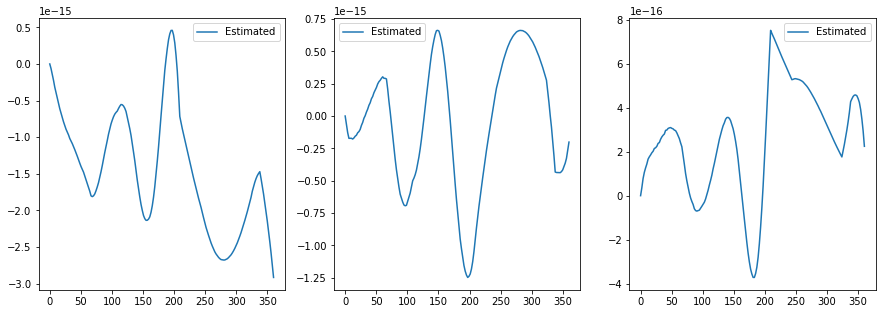

In [69]:
fMRIdet.PlotRecCurve(idxs=[1, 10, 50], saveFigPath=None, is_imag=True)

In [70]:
nYmat = fMRIdet.nYmat
d, n = nYmat.shape
RecCur = fMRIdet.RecResCur.EstXmatReal + fMRIdet.RecResCur.EstXmatImag*1j
fftnYmat = np.fft.fft(nYmat, axis=1)
fftRecCur = np.fft.fft(RecCur, axis=1)

In [71]:
diff = fftnYmat - fftRecCur
errs2 = np.sum(np.abs(diff)**2, axis=1)/np.sum(np.abs(fftnYmat)**2, axis=1)
errs = np.sqrt(errs2)
argidxs = np.argsort(errs)
qidxs = np.quantile(np.arange(d), [0, 0.25, 0.5, 0.75, 1]).astype(np.int)
idxs = argidxs[qidxs]

### Real part after the FFT

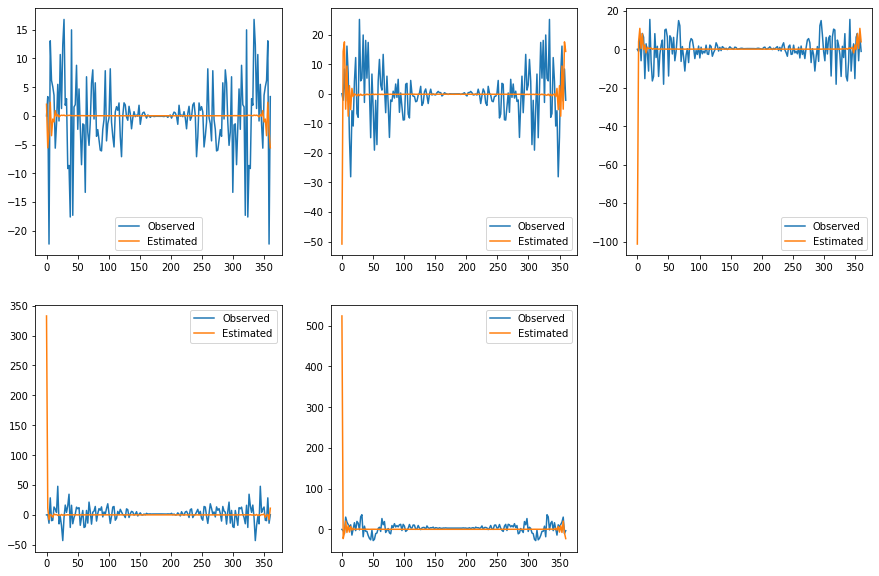

In [72]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, fftnYmat.real[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, fftRecCur.real[idx, :], label="Estimated")
    plt.legend()

### Imaginary part after the FFT

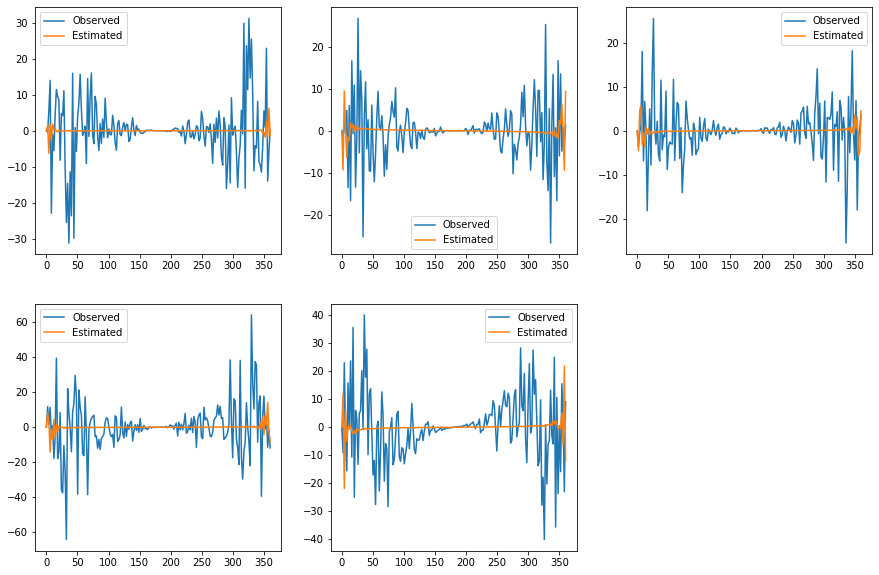

In [73]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, fftnYmat.imag[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, fftRecCur.imag[idx, :], label="Estimated")
    plt.legend()

### Plot the eigenvalue curve under the optimal kappa

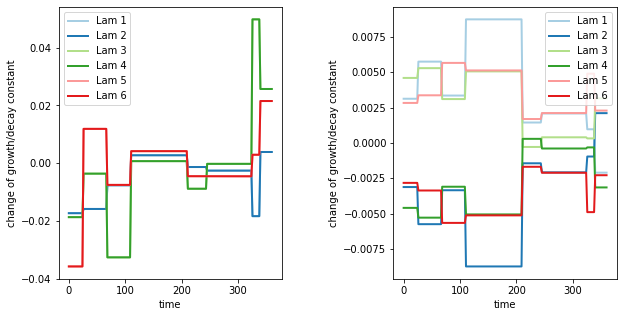

In [74]:
fMRIdet.PlotEigenCurve(saveFigPath=None)

## 6. Detection with no Spline smooth

In [75]:
fMRIdetNoSpl = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=False,
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5)

In [76]:
fMRIdetNoSpl._Preprocess()

In [77]:
d, n = fMRIdetNoSpl.nYmat.shape
T = fMRIdetNoSpl.paras.T
time = np.linspace(0, T, n)
Xmat = fMRIdetNoSpl.nYmat

### Calculate the derivative of X(t) with dx/dt. 

The last column is imputed by the mean of dXmat

In [78]:
deltaT = np.diff(time)[0]
dXmat0 = np.diff(fMRIdetNoSpl.nYmat, axis=1)/deltaT
dXmatLast = np.mean(dXmat0, axis=1).reshape(90, 1)
dXmat = np.concatenate((dXmat0, dXmatLast), axis=1)

In [79]:
fMRIdetNoSpl.dXmat, fMRIdetNoSpl.Xmat = dXmat, Xmat

In [80]:
fMRIdetNoSpl()

In [81]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdetNoSpl.TuningKappa(kappas)

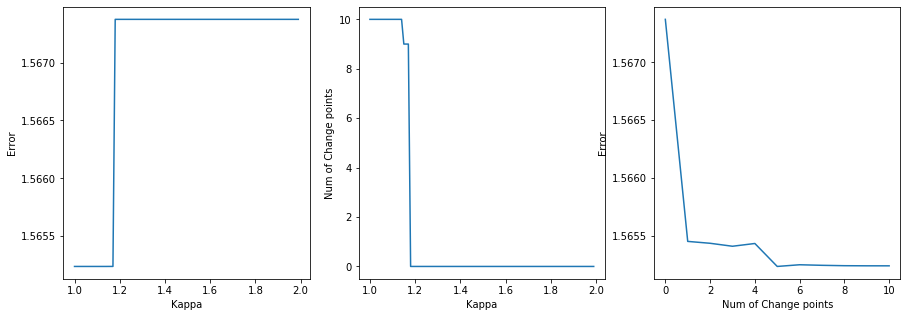

In [82]:
fMRIdetNoSpl.PlotKappaErrCurve()

In [83]:
print("The optimal kappas are:", fMRIdetNoSpl.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdetNoSpl.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdetNoSpl.optNumChg)

The optimal kappas are: 1.0
The optimal number of change point under the range of kappa we speicified is: 10
The optimal number of change point is: 5


In [84]:
fMRIdetNoSpl.UpdateEcpts()

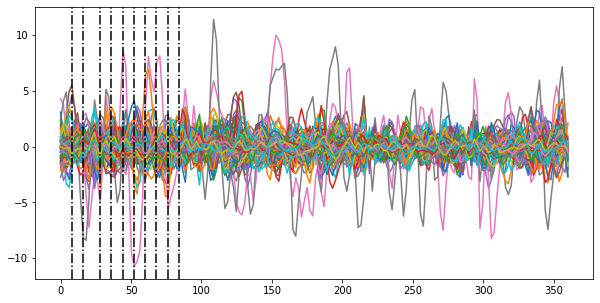

In [85]:
fMRIdetNoSpl.PlotEcpts()

In [49]:
fMRIdetNoSpl.PlotRecCurve()

NameError: name 'fMRIdetNoSpl' is not defined

### Plot the reconstructed imaginary part

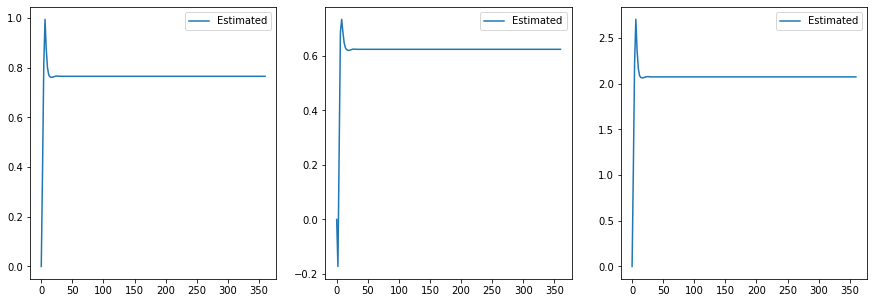

In [87]:
fMRIdetNoSpl.PlotRecCurve([1, 10, 50], saveFigPath=None, is_imag=True)

In [88]:
nYmat = fMRIdetNoSpl.nYmat
d, n = nYmat.shape
RecCur = fMRIdetNoSpl.RecResCur.EstXmatReal + fMRIdetNoSpl.RecResCur.EstXmatImag*1j
fftnYmat = np.fft.fft(nYmat, axis=1)
fftRecCur = np.fft.fft(RecCur, axis=1)

In [89]:
diff = fftnYmat - fftRecCur
errs2 = np.sum(np.abs(diff)**2, axis=1)/np.sum(np.abs(fftnYmat)**2, axis=1)
errs = np.sqrt(errs2)
argidxs = np.argsort(errs)
qidxs = np.quantile(np.arange(d), [0, 0.25, 0.5, 0.75, 1]).astype(np.int)
idxs = argidxs[qidxs]

### Real part after the FFT

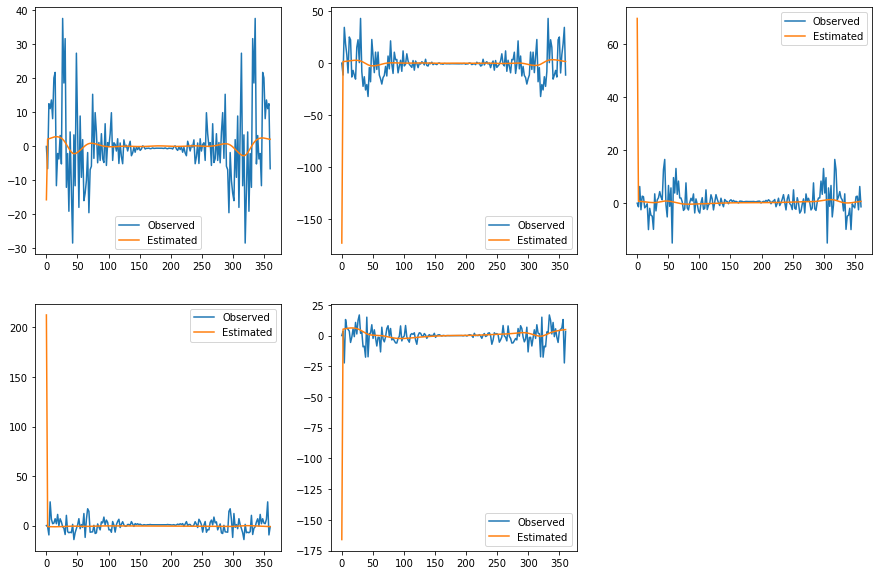

In [90]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdetNoSpl.ptime, fftnYmat.real[idx, :], label="Observed")
    plt.plot(fMRIdetNoSpl.ptime, fftRecCur.real[idx, :], label="Estimated")
    plt.legend()

### Imaginary part after the FFT

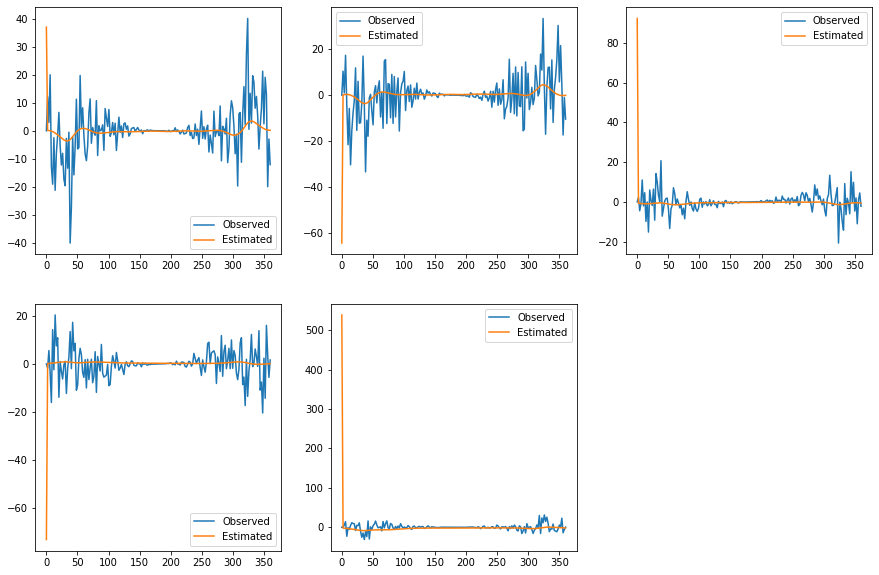

In [91]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdetNoSpl.ptime, fftnYmat.imag[idx, :], label="Observed")
    plt.plot(fMRIdetNoSpl.ptime, fftRecCur.imag[idx, :], label="Estimated")
    plt.legend()

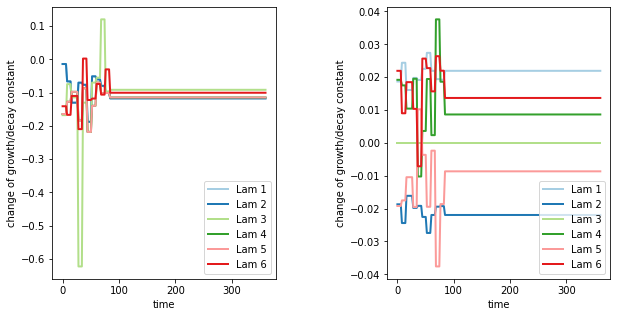

In [92]:
fMRIdetNoSpl.PlotEigenCurve()

## 7. Detection with B-spline and `1e-4` smooth penalty parameter and `1/1.2` current bandwith `h`

In [93]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=False, 
                     r=6, kappa=1.65, fct=0.5/1.2, lamb=1e-4, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5)

In [94]:
fMRIdet()

### Tuning the kappa parameters

In [95]:
kappas = np.arange(1.45, 2, step=0.01)
fMRIdet.TuningKappa(kappas)

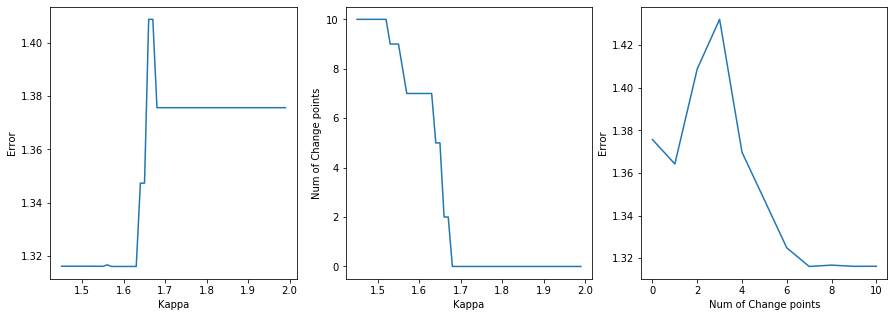

In [96]:
fMRIdet.PlotKappaErrCurve()

### Then we  can check the best kappa parameters w.r.t mean square errors

In [97]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.57
The optimal number of change point under the range of kappa we speicified is: 7
The optimal number of change point is: 7


### Check the results after updating

In [98]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+--------------------------------------+--------------------+------+
| Num of CPTs |            Estiamted CPTs            |        MSE         | Rank |
+-------------+--------------------------------------+--------------------+------+
|      7      | [ 16.  31.  48.  72. 111. 140. 165.] | 1.3161574243723348 |  6   |
+-------------+--------------------------------------+--------------------+------+


### Plot the detection results under the optimal kappa

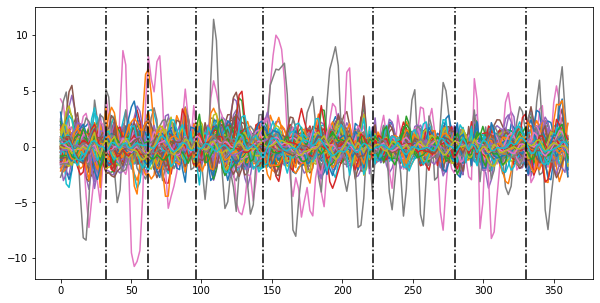

In [99]:
fMRIdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa

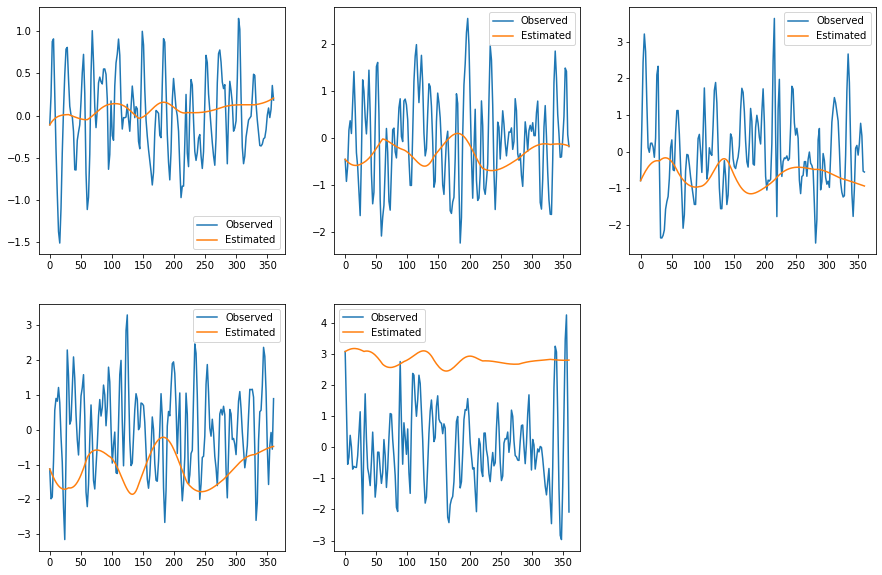

In [100]:
fMRIdet.PlotRecCurve(saveFigPath=None)

### Plot the reconstructed imaginary part

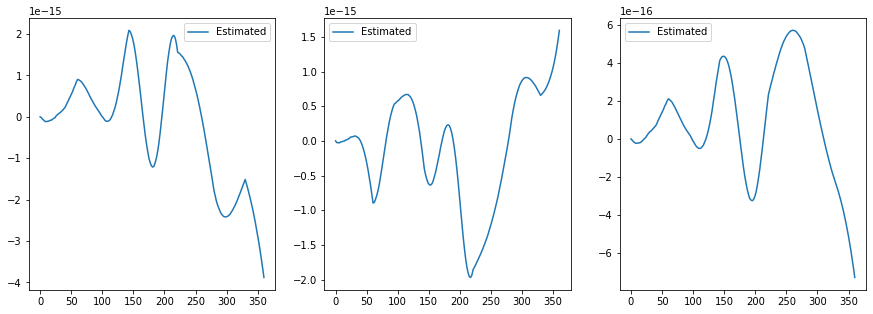

In [101]:
fMRIdet.PlotRecCurve([1, 10, 50], saveFigPath=None, is_imag=True)

In [102]:
nYmat = fMRIdet.nYmat
d, n = nYmat.shape
RecCur = fMRIdet.RecResCur.EstXmatReal + fMRIdet.RecResCur.EstXmatImag*1j
fftnYmat = np.fft.fft(nYmat, axis=1)
fftRecCur = np.fft.fft(RecCur, axis=1)

In [103]:
diff = fftnYmat - fftRecCur
errs2 = np.sum(np.abs(diff)**2, axis=1)/np.sum(np.abs(fftnYmat)**2, axis=1)
errs = np.sqrt(errs2)
argidxs = np.argsort(errs)
qidxs = np.quantile(np.arange(d), [0, 0.25, 0.5, 0.75, 1]).astype(np.int)
idxs = argidxs[qidxs]

### Real part after the FFT

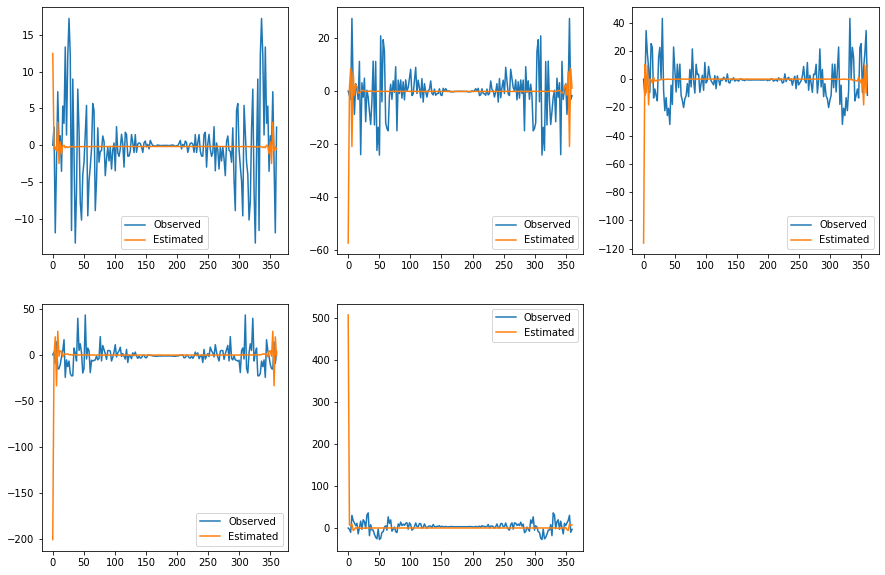

In [104]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, fftnYmat.real[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, fftRecCur.real[idx, :], label="Estimated")
    plt.legend()

### Imaginary part after the FFT

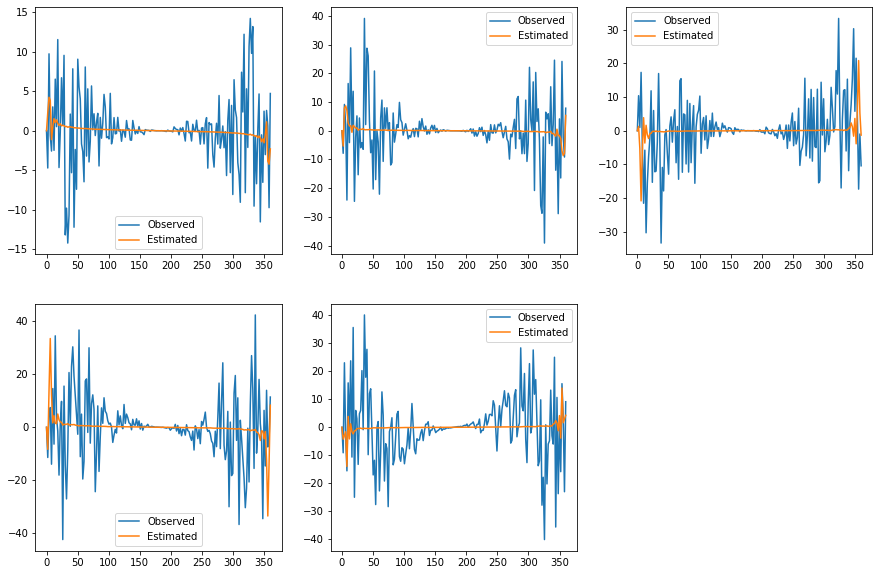

In [105]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdet.ptime, fftnYmat.imag[idx, :], label="Observed")
    plt.plot(fMRIdet.ptime, fftRecCur.imag[idx, :], label="Estimated")
    plt.legend()

### Plot the eigenvalue curve under the optimal kappa

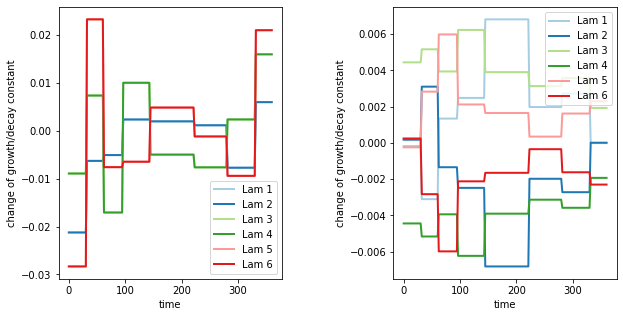

In [106]:
fMRIdet.PlotEigenCurve(saveFigPath=None)

## 8. Detection with Spline smooth only in dervative of `X(t)`

In [107]:
fMRIdetNoSpl = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=False,
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5)

In [108]:
fMRIdetNoSpl._Preprocess()

In [109]:
d, n = fMRIdetNoSpl.nYmat.shape
T = fMRIdetNoSpl.paras.T
time = np.linspace(0, T, n)
Xmat = fMRIdetNoSpl.nYmat

### Calculate the derivative of X(t) with dx/dt and apply B-spline to it 

In [110]:
deltaT = np.diff(time)[0]
dXmat0 = np.diff(fMRIdetNoSpl.nYmat, axis=1)/deltaT
dXmatLast = np.mean(dXmat0, axis=1).reshape(90, 1)
dXmat = np.concatenate((dXmat0, dXmatLast), axis=1)

In [111]:
_, dXmat = GetBsplineEst(dXmat, time, lamb=1e-4)

In [112]:
fMRIdetNoSpl.dXmat, fMRIdetNoSpl.Xmat = dXmat, Xmat

In [113]:
fMRIdetNoSpl()

In [114]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdetNoSpl.TuningKappa(kappas)

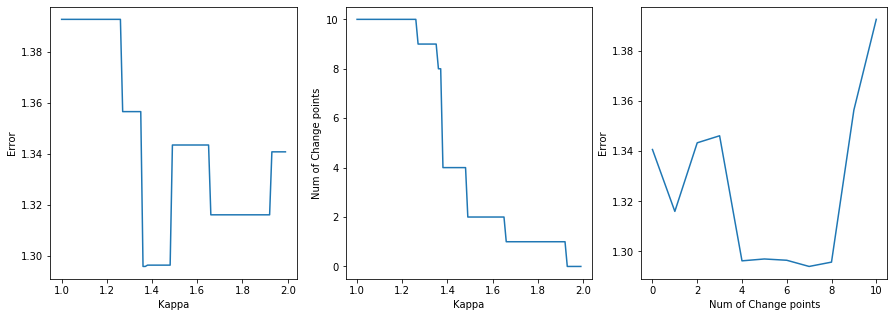

In [115]:
fMRIdetNoSpl.PlotKappaErrCurve()

In [116]:
print("The optimal kappas are:", fMRIdetNoSpl.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdetNoSpl.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdetNoSpl.optNumChg)

The optimal kappas are: 1.3600000000000003
The optimal number of change point under the range of kappa we speicified is: 8
The optimal number of change point is: 7


In [117]:
fMRIdetNoSpl.UpdateEcpts()

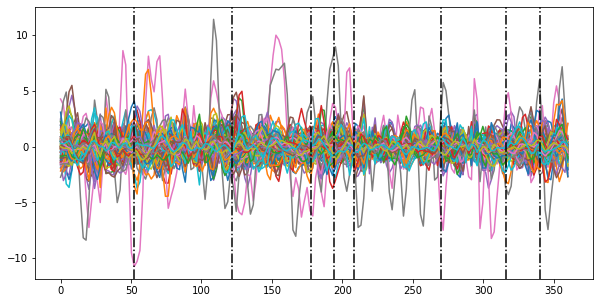

In [118]:
fMRIdetNoSpl.PlotEcpts()

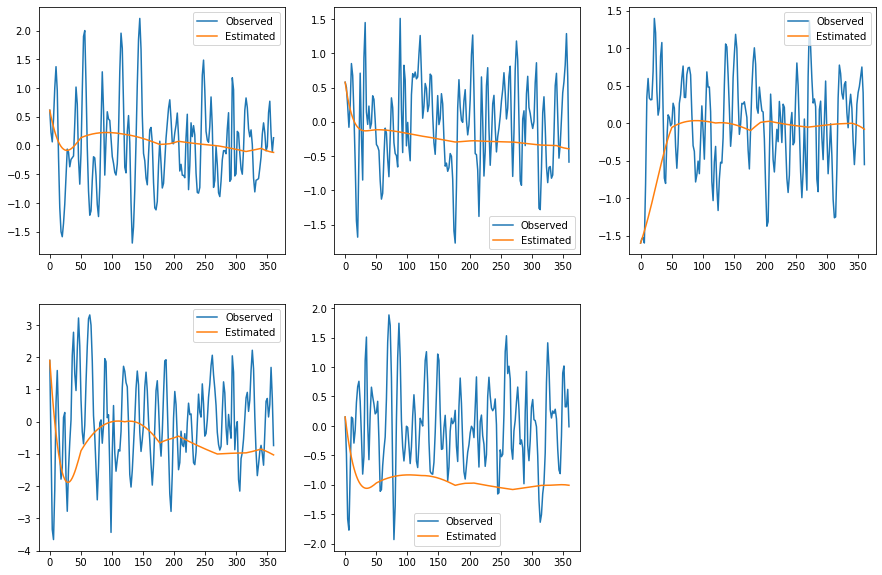

In [119]:
fMRIdetNoSpl.PlotRecCurve()

### Plot the reconstructed imaginary part

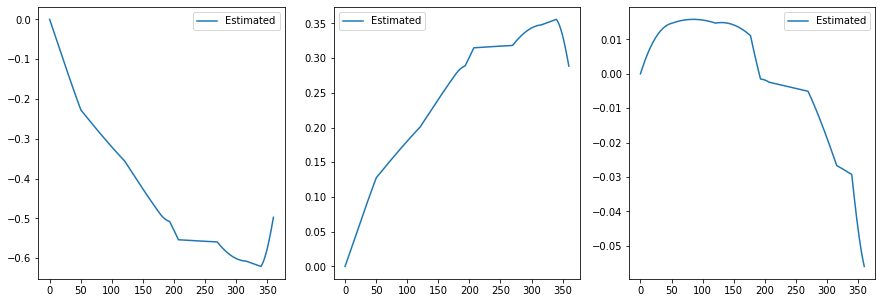

In [120]:
fMRIdetNoSpl.PlotRecCurve([1, 10, 50], saveFigPath=None, is_imag=True)

In [121]:
nYmat = fMRIdetNoSpl.nYmat
d, n = nYmat.shape
RecCur = fMRIdetNoSpl.RecResCur.EstXmatReal + fMRIdetNoSpl.RecResCur.EstXmatImag*1j
fftnYmat = np.fft.fft(nYmat, axis=1)
fftRecCur = np.fft.fft(RecCur, axis=1)

In [122]:
diff = fftnYmat - fftRecCur
errs2 = np.sum(np.abs(diff)**2, axis=1)/np.sum(np.abs(fftnYmat)**2, axis=1)
errs = np.sqrt(errs2)
argidxs = np.argsort(errs)
qidxs = np.quantile(np.arange(d), [0, 0.25, 0.5, 0.75, 1]).astype(np.int)
idxs = argidxs[qidxs]

### Real part after the FFT

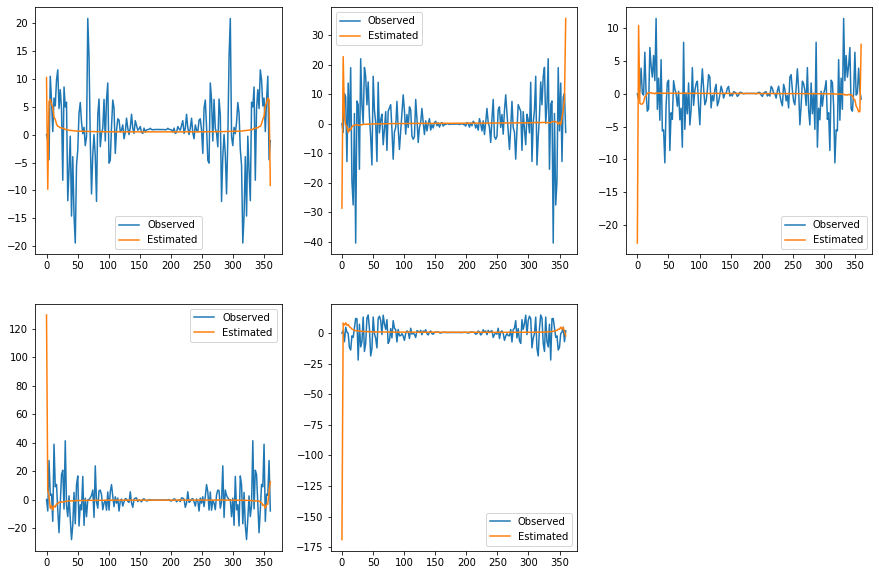

In [123]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdetNoSpl.ptime, fftnYmat.real[idx, :], label="Observed")
    plt.plot(fMRIdetNoSpl.ptime, fftRecCur.real[idx, :], label="Estimated")
    plt.legend()

### Imaginary part after the FFT

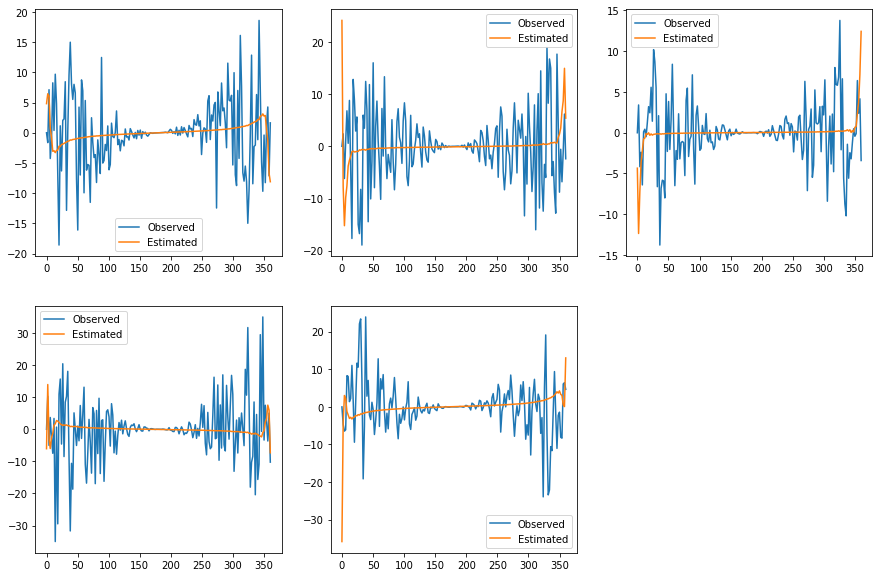

In [124]:
plt.figure(figsize=[15, 10])
for i, idx in enumerate(idxs):
    plt.subplot(2, 3, i+1)
    plt.plot(fMRIdetNoSpl.ptime, fftnYmat.imag[idx, :], label="Observed")
    plt.plot(fMRIdetNoSpl.ptime, fftRecCur.imag[idx, :], label="Estimated")
    plt.legend()

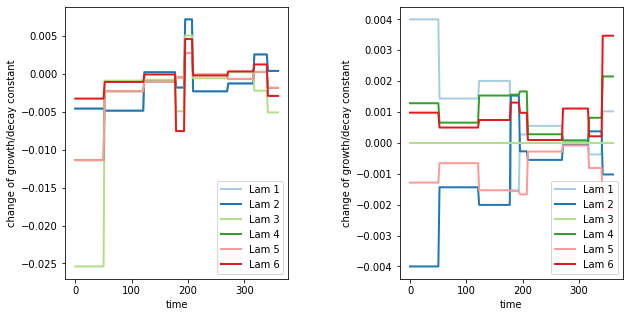

In [125]:
fMRIdetNoSpl.PlotEigenCurve()